# LInear Regression

## Reference

In [52]:
# Schlimmer,Jeffrey. (1987). Automobile. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.
# https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

## Import Library

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
from mlxtend.plotting import heatmap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## IMport dataset

In [54]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/car_price.csv'
car = pd.read_csv(path)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Clean and Organize the dataset

In [55]:
car.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [56]:
object_name = car.select_dtypes('object').columns
# change object to integior type 
le = LabelEncoder()
car[object_name] = car[object_name].apply(le.fit_transform)

# remove the Car Id
car1 = car.copy()
car1 = car1.drop(columns= 'car_ID')


In [60]:
# change the cloumns name to x1 to x25
columnsname = ['x' + str(i) for i in np.arange(1,25)]
columnsname_all = columnsname +['y']
car1.columns = columnsname_all
# standize the dataset
std = StandardScaler()
car1.iloc[:,:] = std.fit_transform(car1.iloc[:,:])

## Correlation Cofficient

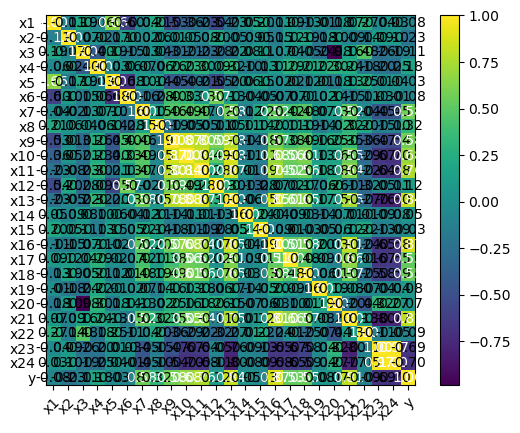

In [61]:
# caculate correlation cofficient
cm = np.corrcoef(car1.T)
hm = heatmap(cm, row_names= car1.columns, column_names= car1.columns)


## LinearRegression

In [64]:
# apply and fit linearregression
model = LinearRegression()
model.fit(car1[columnsname], car1['y'])
model.coef_

array([ 0.01011667, -0.16678411,  0.03023508,  0.03180526, -0.05177088,
       -0.0989971 ,  0.06697098,  0.16643067,  0.0868544 , -0.02571812,
        0.1624849 ,  0.08404058,  0.16994797,  0.02150019,  0.01869851,
        0.44427879,  0.01855028, -0.03333798, -0.1054066 ,  0.08225175,
        0.13015014,  0.08893108, -0.07021006,  0.10880118])

In [76]:
model.score(car1[columnsname], car1['y'])

0.8982965320447058

### Class

In [82]:
class LinearRegressionGD:
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
    self.b_ = np.array([0.])
    self.losses_ = []
    
    
    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = y - output
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta *2.0 * errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)
    
    return self
  
  
  def net_input(self , X):
    return np.dot(X, self.w_) + self.b_
  
  def predict(self , X):
    return self.net_input(X)

  def premeter(self, X, y):
    return self.w_
  
  def intersection(self, X, y):
    return self.b_

In [98]:
model1 = LinearRegressionGD(eta = 0.06, n_iter = 100, random_state= 1230)
model1.fit(X = car1[columnsname], y = car1['y'])
model1.premeter(X = car1[columnsname], y = car1['y']).round(3)

x1     0.008
x2    -0.169
x3    -0.013
x4    -0.003
x5    -0.044
x6    -0.094
x7     0.068
x8     0.172
x9     0.090
x10    0.023
x11    0.141
x12    0.065
x13    0.161
x14    0.031
x15   -0.002
x16    0.345
x17    0.008
x18   -0.040
x19   -0.093
x20    0.054
x21    0.227
x22    0.061
x23    0.019
x24    0.019
dtype: float64

In [97]:
model1.intersection(X = car1[columnsname], y = car1['y']).round(3)

array([-0.])

### Loss graph

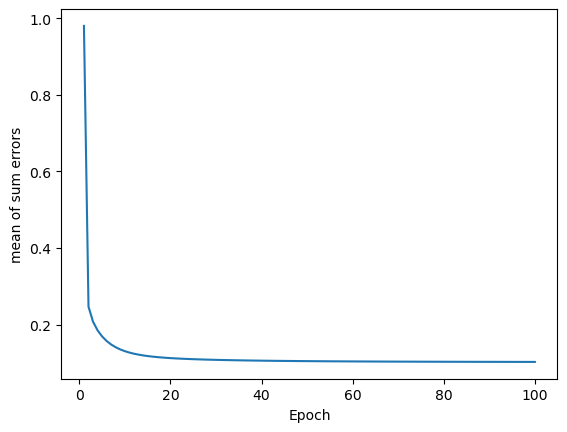

In [96]:
plt.plot(range(1, model1.n_iter +1), model1.losses_)
plt.ylabel('mean of sum errors')
plt.xlabel('Epoch')
plt.show()